# Importing necessary libraries

In [1]:
import zipfile
import numpy as np
import cv2
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import tempfile, os
import shutil
from scipy.spatial.distance import euclidean

# Getting Data
- First opening a temporary directory and unzip files to it, getting names of file into a list and from file name list getting paths of files

In [2]:
# First opening e temporary directory and unzip files to it, getting names of file into a list
# and from file name list getting paths of files
# Create a temporary directory to store the extracted images
with tempfile.TemporaryDirectory() as tempdir:
    # Extract images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)

    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

# Edge Detection part

In [36]:
def canny_edge_detection(image, low_threshold, high_threshold):
    gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_scaled_image = cv2.convertScaleAbs(gray_scale_image)
    canny_image = cv2.Canny(gray_scaled_image, low_threshold, high_threshold)
    return  canny_image

# Displaying one image

C:\Users\ata_h\AppData\Local\Temp\tmp9rlw6ruw\template images/chess.png


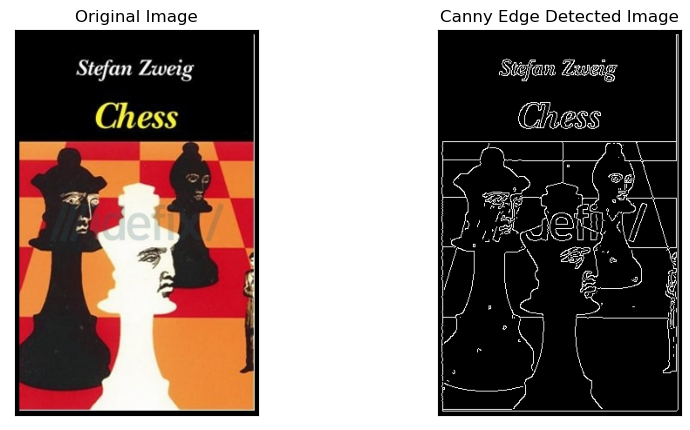

In [93]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]
    
    # For demonstration I will show only one image from template images in first parts
    # path for chess image in the template images 
    img_path = os.path.join(tempdir, template_images[2])
    print(img_path)
    
    img = cv2.imread(img_path)
    
    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    canny_image = canny_edge_detection(img, low_threshold, high_threshold)

    # Display the original and edge detected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(canny_image, cmap = 'gray')
    plt.title('Canny Edge Detected Image')
    plt.xticks([]), plt.yticks([])

    plt.show()

# Displaying all canny edge detected images 

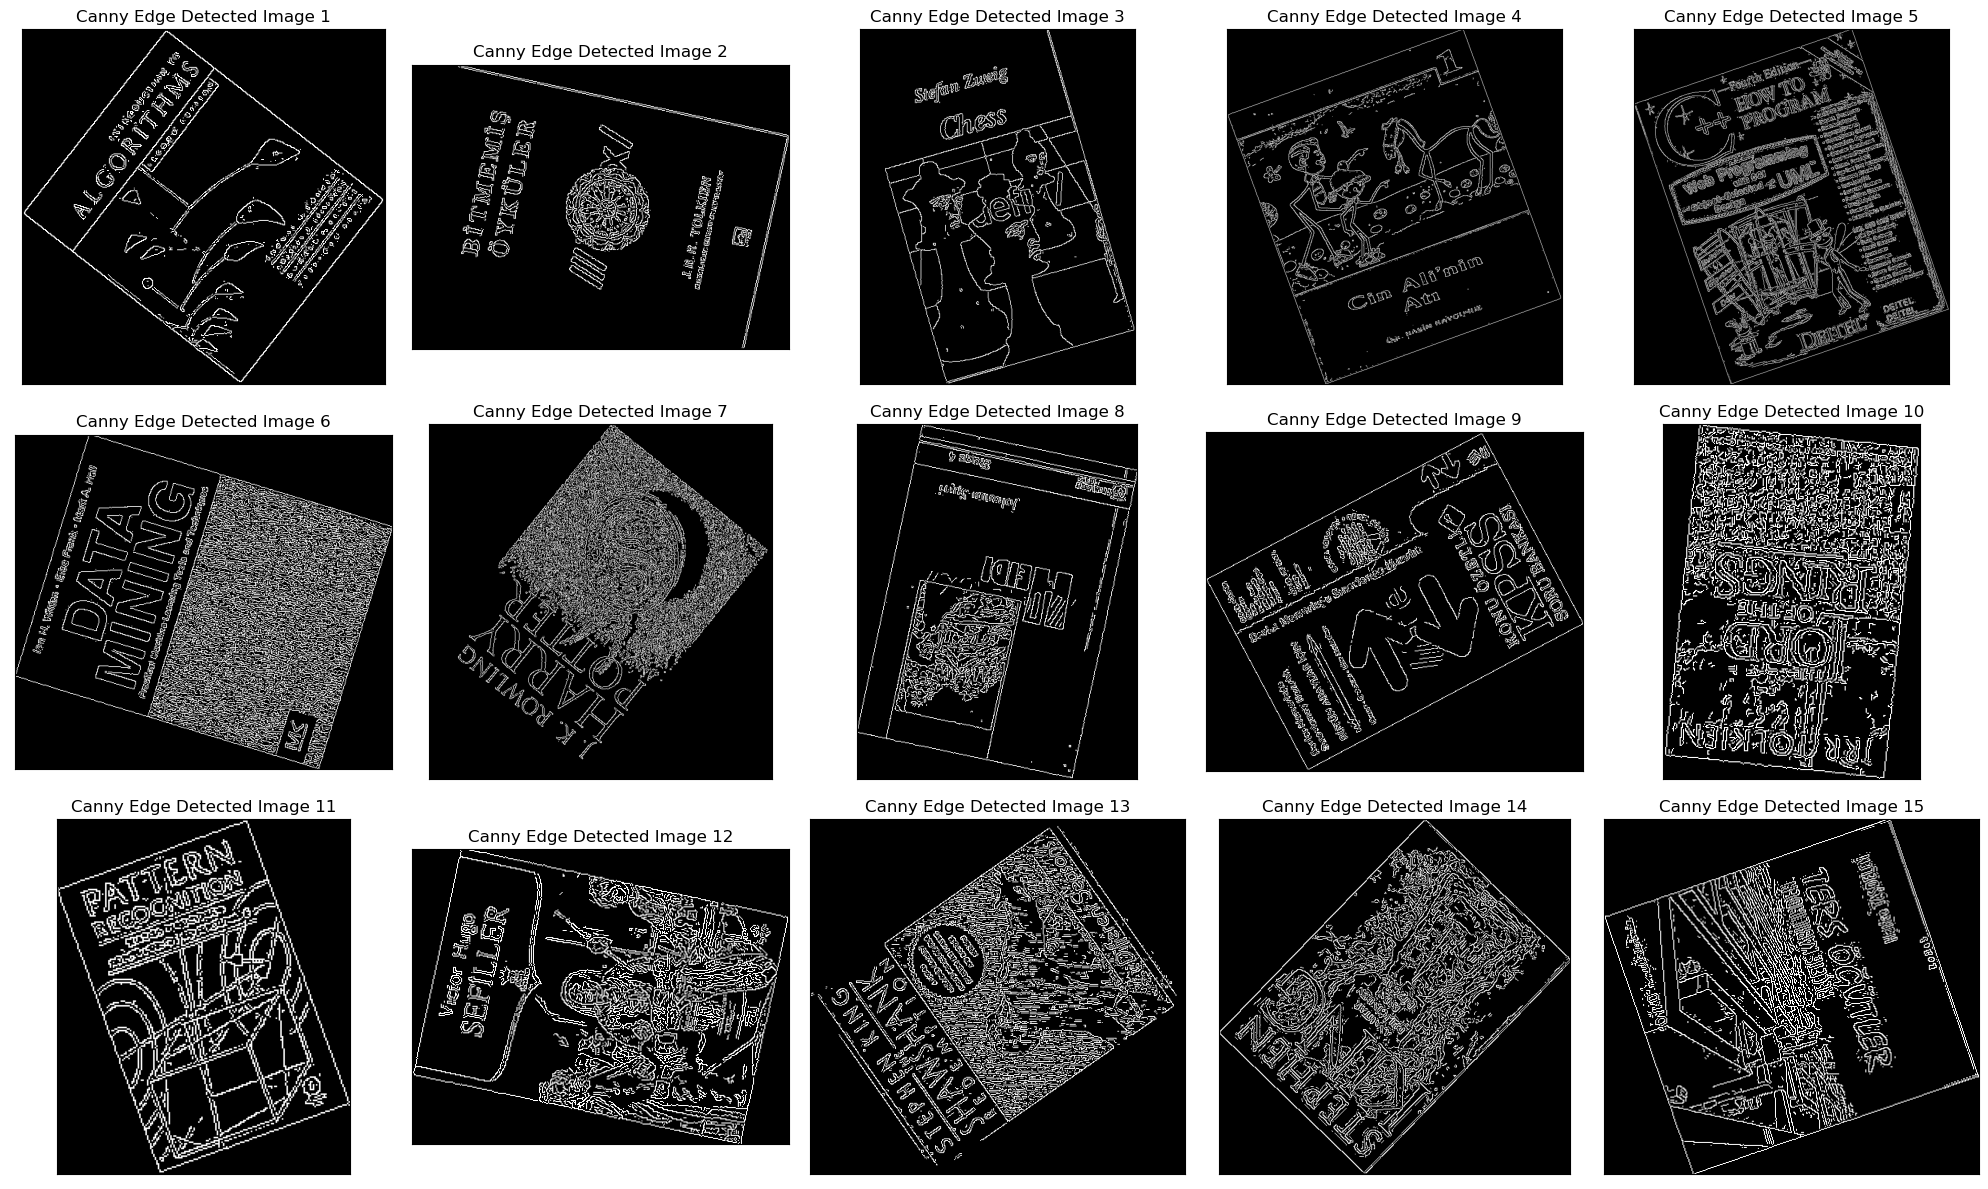

In [38]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]
    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    
    num_images = len(template_images)
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

    for i, img_name in enumerate(rotated_images):
        img_path = os.path.join(tempdir, img_name)
        img = cv2.imread(img_path)
        edges = canny_edge_detection(img, low_threshold, high_threshold)

        axs[i // num_cols, i % num_cols].imshow(edges, cmap='gray')
        axs[i // num_cols, i % num_cols].set_title(f'Canny Edge Detected Image {i+1}')
        axs[i // num_cols, i % num_cols].set_xticks([]), axs[i // num_cols, i % num_cols].set_yticks([])

    for i in range(num_images, num_rows * num_cols):
        axs[i // num_cols, i % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

## Line Detection

In [39]:
def hough_line_detection(canny_image, rho_val, theta_val, threshold_val, min_line_length, max_line_gap):
    rho = rho_val
    theta = theta_val
    threshold = threshold_val
    minLineLength = min_line_length
    maxLineGap = max_line_gap
    lines = cv2.HoughLinesP(canny_image, rho, theta, threshold, minLineLength, maxLineGap=maxLineGap)
    return lines

# Displaying one image in hough line detection

C:\Users\ata_h\AppData\Local\Temp\tmp_o_hk4b7\template images/chess.png


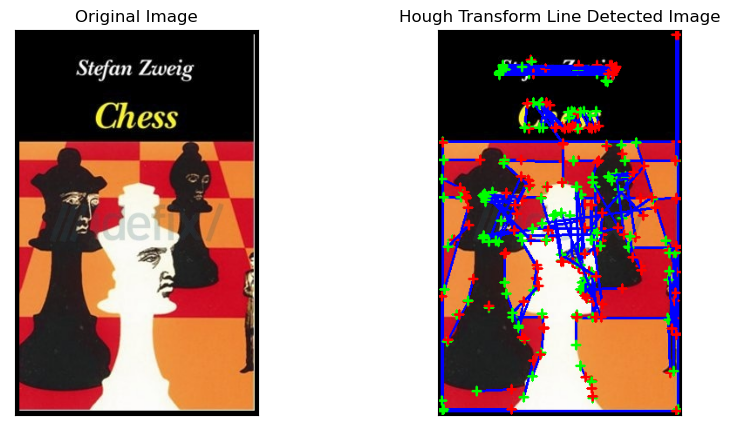

In [67]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]
    
    # For demonstration I will show only one image from template images in first parts
    # path for chess image in the template images 
    img_path = os.path.join(tempdir, template_images[2])
    print(img_path)
    img = cv2.imread(img_path)
    
    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    canny_image = canny_edge_detection(img, low_threshold, high_threshold)
    
    # Setting the parameters for Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 32
    min_line_length = 22
    max_line_gap = 16
    
    # Performing line fitting to find line segments
    lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

    # Plotting the detected lines
    line_img = np.copy(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.drawMarker(line_img, (x1, y1), (0, 255, 0), cv2.MARKER_CROSS, 10, 2)
            cv2.drawMarker(line_img, (x2, y2), (0, 0, 255), cv2.MARKER_CROSS, 10, 2)

    # Displaying the original and line detected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Transform Line Detected Image')
    plt.xticks([]), plt.yticks([])

    plt.show()

# Displaying all hough line detected images

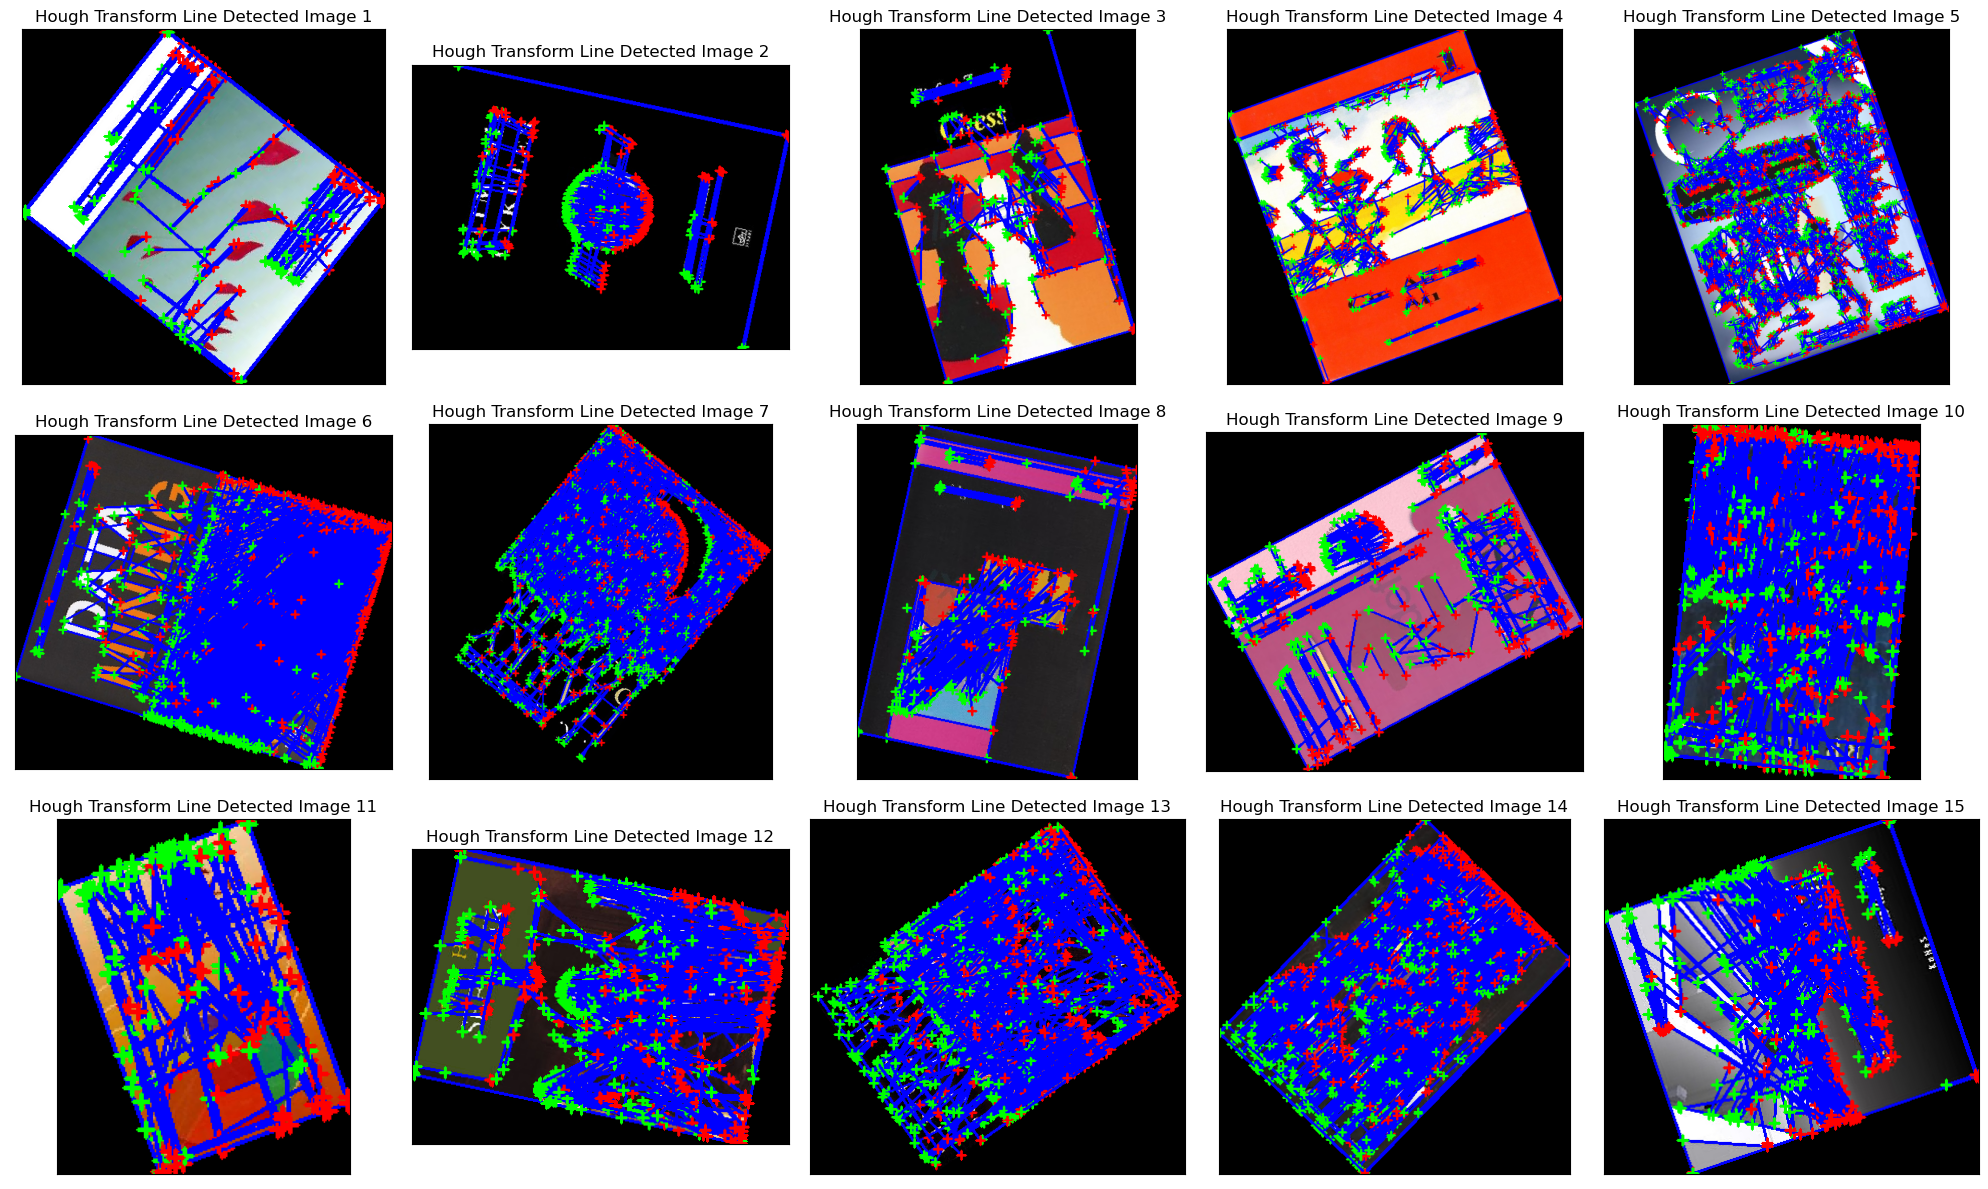

In [36]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    # Setting the parameters for Hough Transform
    rho = 1
    theta = np.pi / 180
    threshold = 32
    min_line_length = 22
    max_line_gap = 16
    
    num_images = len(template_images)
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

    for i, img_name in enumerate(rotated_images):
        img_path = os.path.join(tempdir, img_name)
        img = cv2.imread(img_path)
        canny_image = canny_edge_detection(img, low_threshold, high_threshold)
        lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

        line_img = np.copy(img)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.drawMarker(line_img, (x1, y1), (0, 255, 0), cv2.MARKER_CROSS, 10, 2)
                cv2.drawMarker(line_img, (x2, y2), (0, 0, 255), cv2.MARKER_CROSS, 10, 2)

        axs[i // num_cols, i % num_cols].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
        axs[i // num_cols, i % num_cols].set_title(f'Hough Transform Line Detected Image {i+1}')
        axs[i // num_cols, i % num_cols].set_xticks([]), axs[i // num_cols, i % num_cols].set_yticks([])

    for i in range(num_images, num_rows * num_cols):
        axs[i // num_cols, i % num_cols].axis('off')

    plt.tight_layout()
    plt.show()

# Displaying one in gray scale image in hough line detection

C:\Users\ata_h\AppData\Local\Temp\tmpn0sgep31\template images/chess.png


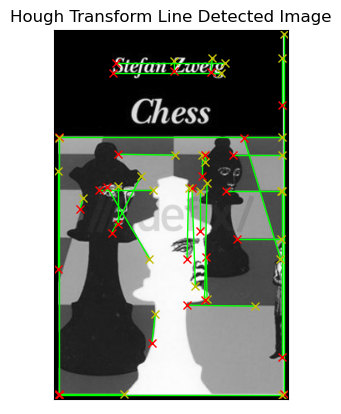

In [86]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]
    
    # For demonstration I will show only one image from template images in first parts
    # path for chess image in the template images 
    img_path = os.path.join(tempdir, template_images[2])
    print(img_path)
    img = cv2.imread(img_path)
    
    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    canny_image = canny_edge_detection(img, low_threshold, high_threshold)
    
    # Setting the parameters for Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 60
    min_line_length = 22
    max_line_gap = 16
    
    # Performing line fitting to find line segments
    lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

    # Plotting the detected lines
    line_img = np.copy(img)
    gray_scale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            plt.plot([x1, x2], [y1, y2], color='lime', linestyle='-', linewidth=1)
            plt.plot(x1, y1, marker='x', color='r')
            plt.plot(x2, y2, marker='x', color='y')


    plt.imshow(cv2.cvtColor(gray_scale_img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Transform Line Detected Image')
    plt.xticks([]), plt.yticks([])

    plt.show()

# Displaying all images in gray scale format in hough line detection

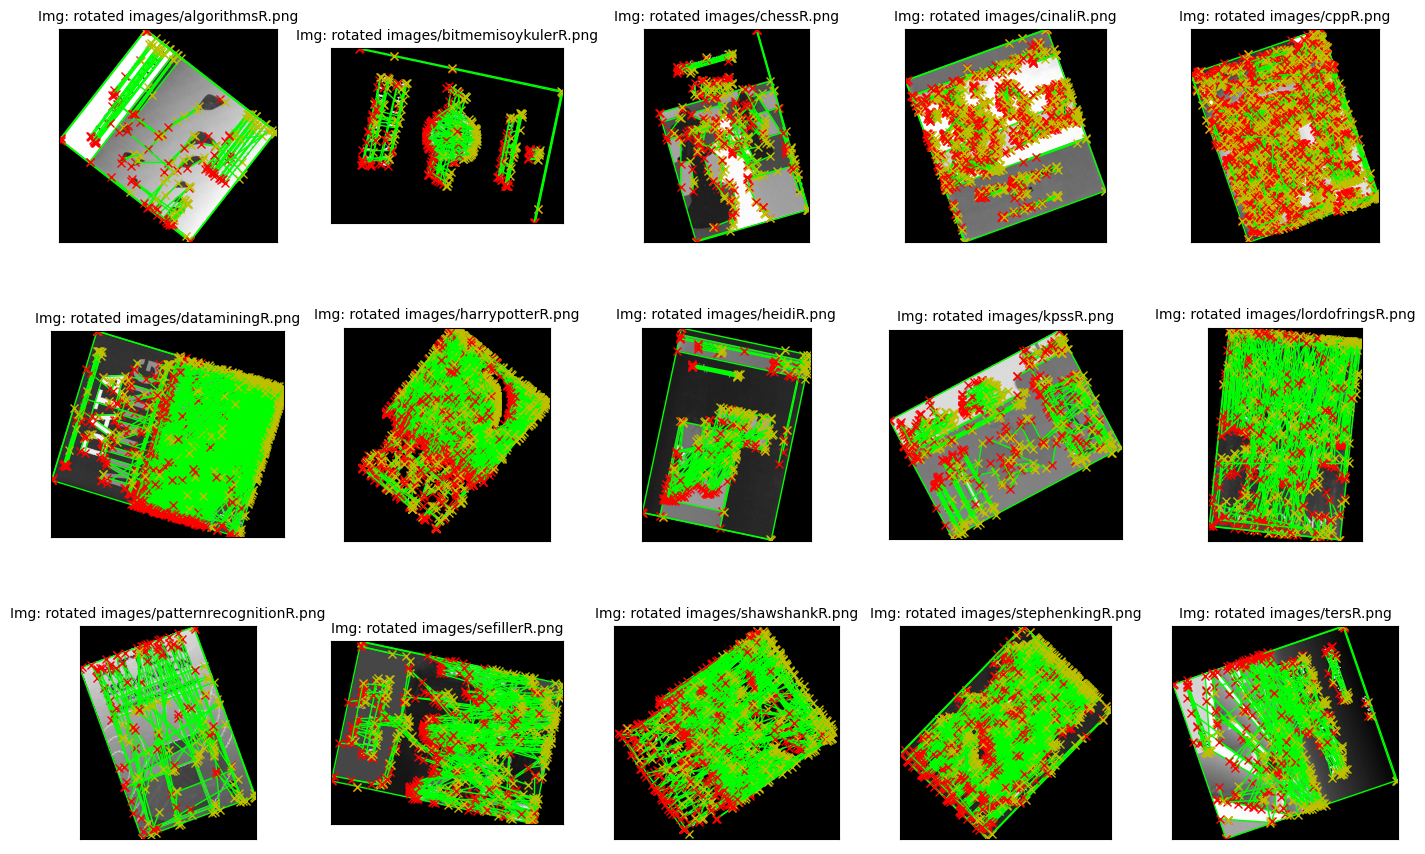

In [70]:
# Creating a temporary directory to store the extracted images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

    # Define grid dimensions for subplots
    grid_rows = 3
    grid_cols = 5

    # Create a figure with subplots
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 9))
    fig.tight_layout()

    for idx, img_name in enumerate(rotated_images):
        # path for image in the template images
        img_path = os.path.join(tempdir, img_name)
        img = cv2.imread(img_path)

        # Setting parameters for canny edge detection
        low_threshold, high_threshold = 42, 61
        canny_image = canny_edge_detection(img, low_threshold, high_threshold)

        # Setting the parameters for Hough Transform
        rho = 1
        theta = np.pi/180
        threshold = 32
        min_line_length = 22
        max_line_gap = 16

        # Performing line fitting to find line segments
        lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

        # Plotting the detected lines
        gray_scale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ax = axes[idx // grid_cols, idx % grid_cols]

        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                ax.plot([x1, x2], [y1, y2], color='lime', linestyle='-', linewidth=1)
                ax.plot(x1, y1, marker='x', color='r')
                ax.plot(x2, y2, marker='x', color='y')

        ax.imshow(gray_scale_img, cmap='gray')
        ax.set_title(f'Img: {img_name}', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    # Adjust spacing between subplots
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.4)
    plt.show()


# Computing line oriention histograms

In [4]:
def compute_line_orientation_histogram(lines, num_bins):
    if lines is None:
        return np.zeros(num_bins)
    # getting angle values into line angles list
    line_angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1)
        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        line_angles.append((angle, length))
    # returning histogram of frequencies of angles
    hist, _ = np.histogram([angle for angle, _ in line_angles], bins=num_bins, range=(-np.pi/2, np.pi/2), weights=[length for _, length in line_angles])
    return hist

# Displaying line orientation histogram for one image

C:\Users\ata_h\AppData\Local\Temp\tmpajuv0mog\template images/chess.png


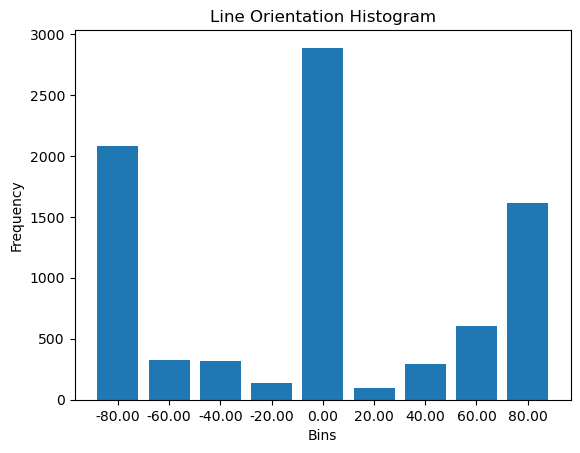

In [94]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]
    
    # For demonstration I will show only one image from template images in first parts
    # path for chess image in the template images 
    img_path = os.path.join(tempdir, template_images[2])
    print(img_path)
    img = cv2.imread(img_path)
    
    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    canny_image = canny_edge_detection(img, low_threshold, high_threshold)
    
    # Setting the parameters for Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 32
    min_line_length = 22
    max_line_gap = 16
    
    # Performing line fitting to find line segments
    lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

    # Plotting the detected lines
    line_img = np.copy(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Computing line orientation histogram
    num_bins = 9
    hist = compute_line_orientation_histogram(lines, num_bins)
    bin_edges = np.linspace(-90, 90, num_bins + 1)
    
    # Plotting the line orientation histogram
    plt.bar(np.arange(len(hist)), hist, tick_label=[f"{(bin_edges[i] + bin_edges[i + 1]) / 2:.2f}" for i in range(len(bin_edges) - 1)])
    plt.title("Line Orientation Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Frequency")
    plt.show()

# Displaying line orientation histogram for all images

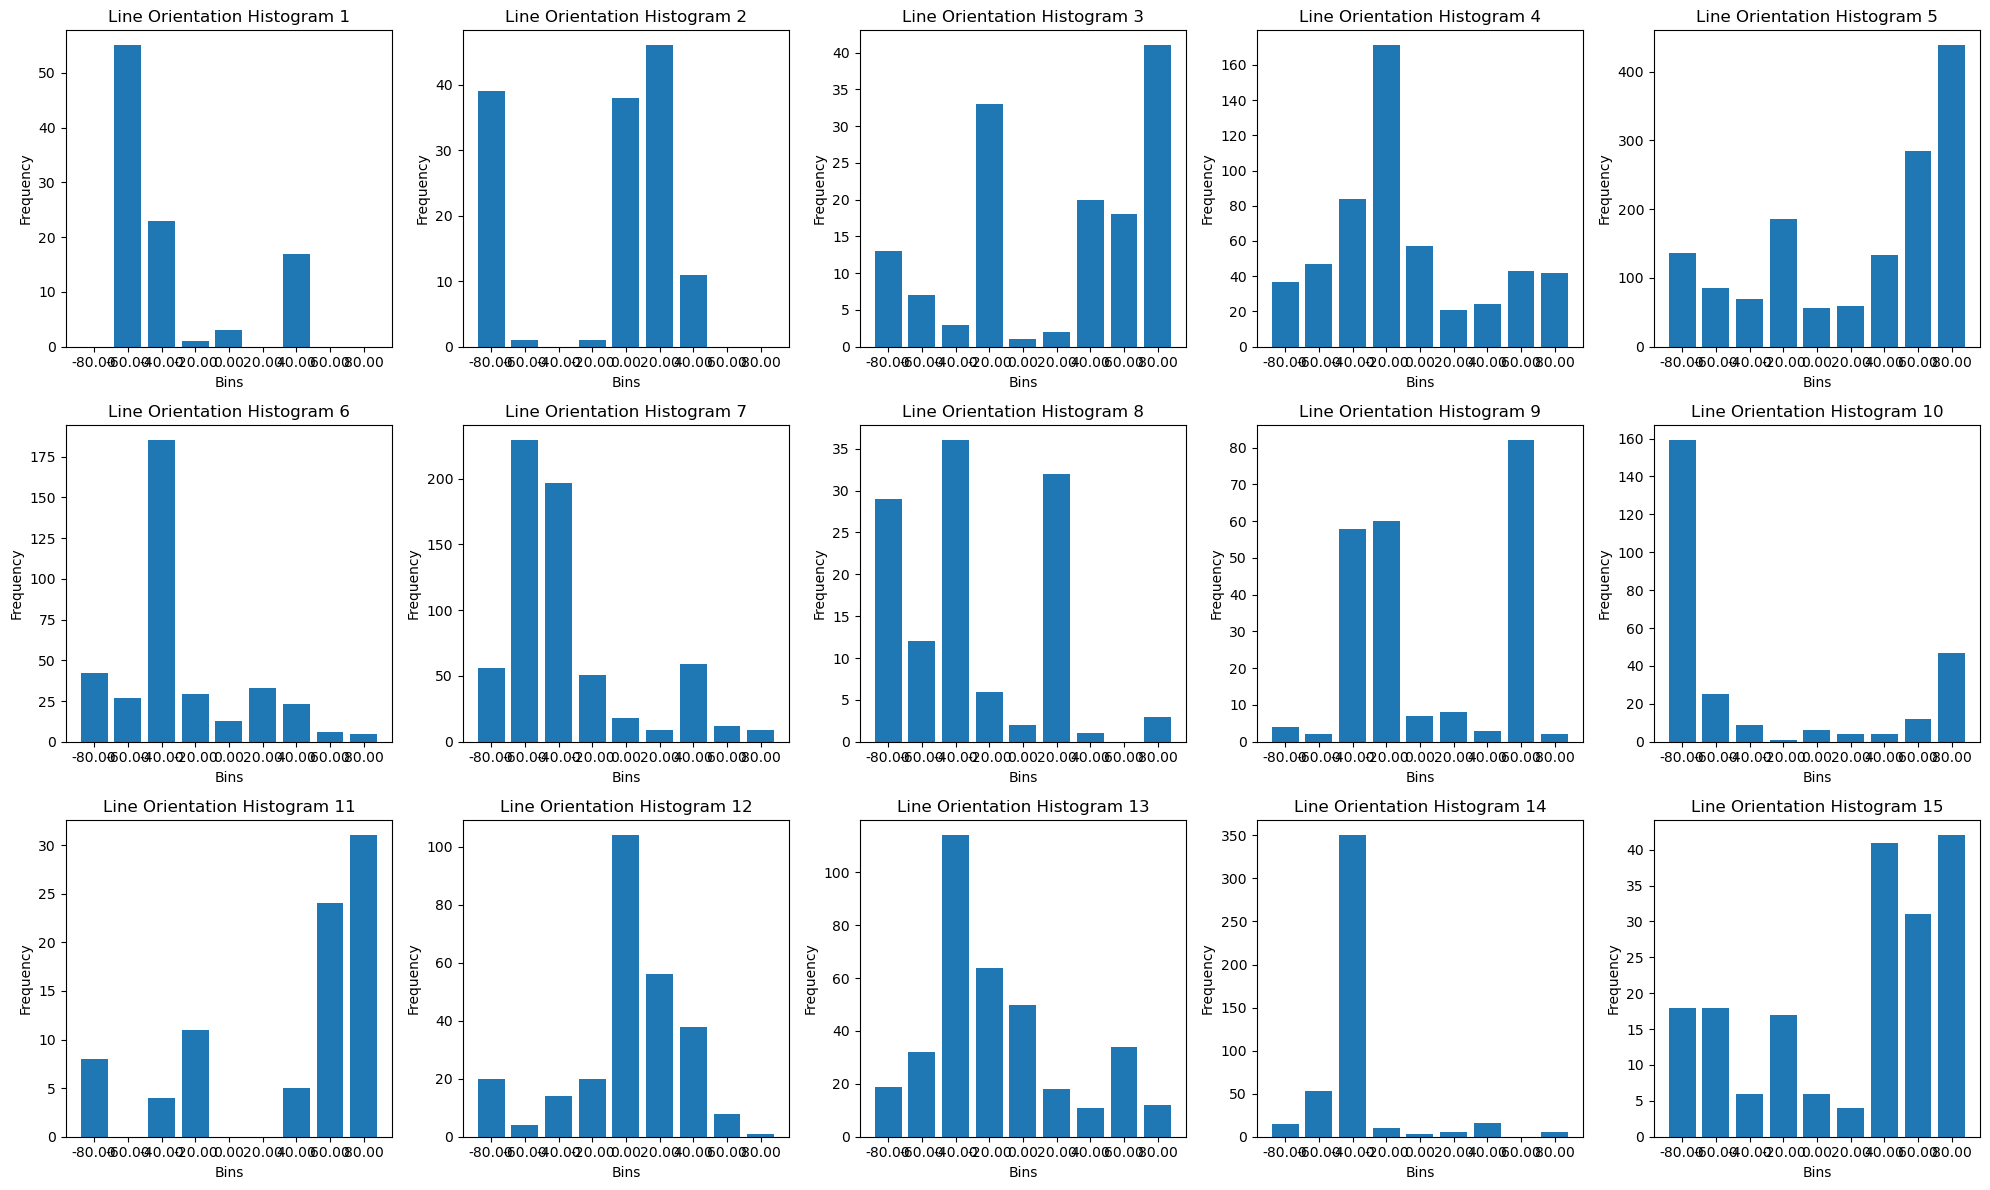

In [42]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

    # Setting parameters for canny edge detection
    low_threshold, high_threshold = 42, 61
    # Set the parameters for Hough Transform
    rho = 1
    theta = np.pi / 180
    threshold = 32
    min_line_length = 22
    max_line_gap = 16
    # plotting parameters
    num_images = len(template_images)
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

    for i, img_name in enumerate(rotated_images):
        img_path = os.path.join(tempdir, img_name)
        img = cv2.imread(img_path)
        canny_image = canny_edge_detection(img, low_threshold, high_threshold)
        lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

        num_bins = 9
        hist = compute_line_orientation_histogram(lines, num_bins)
        bin_edges = np.linspace(-90, 90, num_bins + 1)

        axs[i // num_cols, i % num_cols].bar(np.arange(len(hist)), hist, tick_label=[f"{(bin_edges[j] + bin_edges[j + 1]) / 2:.2f}" for j in range(len(bin_edges) - 1)])
        axs[i // num_cols, i % num_cols].set_title(f'Line Orientation Histogram {i+1}')
        axs[i // num_cols, i % num_cols].set_xlabel("Bins")
        axs[i // num_cols, i % num_cols].set_ylabel("Frequency")

    for i in range(num_images, num_rows * num_cols):
        axs[i // num_cols, i % num_cols].axis('off')

    plt.tight_layout()
    plt.show()


# Getting this process alltogether at one function

In [5]:
def image_processing(image, low_threshold, high_threshold, rho, theta, threshold, min_line_length, max_line_gap, num_bins):
    # First, performing edge detection
    canny_image = canny_edge_detection(image, low_threshold, high_threshold)

    # Then, Performing line fitting to find line segments
    lines = hough_line_detection(canny_image, rho, theta, threshold, min_line_length, max_line_gap)

    # Recording lines detected
    line_image = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    hist = compute_line_orientation_histogram(lines, num_bins)
    # Returning histogram of frequency of angles
    return hist

## Matching and computing line rotation angle

In [462]:
# Best parameters for matching process

# Set parameters for Canny Edge detection
template_low_threshold = 42
template_high_threshold = 61
rotated_low_threshold = 42
rotated_high_threshold = 61

# Set the parameters for Hough Transform
rho = 1
theta = np.pi/180
threshold = 19
min_line_length = 55
max_line_gap = 27

# histogram parameters
num_bins = 9

In [109]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

    # lists for storing necessary values
    histograms = []
    image_names = []
    rotated_image_names = []
    best_matches = []
    
    # Processing template images
    for image_name in template_images:
        image_path = os.path.join(tempdir, image_name)
        image = cv2.imread(image_path)
        histograms.append(image_processing(image, template_low_threshold, template_high_threshold, rho, theta, threshold, min_line_length, max_line_gap, num_bins))
        image_names.append(image_name)
        
    # Processing rotated images
    for rotated_image_name in rotated_images:
        rotated_image_path = os.path.join(tempdir, rotated_image_name)
        rotated_image = cv2.imread(rotated_image_path)
        rotated_histogram = image_processing(rotated_image, rotated_low_threshold, rotated_high_threshold, rho, theta, threshold, min_line_length, max_line_gap, num_bins)
        rotated_image_names.append(rotated_image_name)
        
        # Finding match and rotation angle
        min_distance = float('inf')
        best_match = -1
        best_shift = -1
        
        # Matching process
        for i, template_histogram in enumerate(histograms):
            for shift in range(len(template_histogram)):
                shifted_histogram = np.roll(rotated_histogram, shift)
                distance = euclidean(template_histogram, shifted_histogram)
                if distance < min_distance:
                    min_distance = distance
                    best_match = i
                    best_shift = shift
        # Finding the angle
        rotation_angle = (180 * best_shift) / len(histograms[best_match])
        # Printing results
        print(f"Rotated Image: {rotated_image_name}, Matched Template: {template_images[best_match]}, Rotation Angle: {rotation_angle:.2f}")
        best_matches.append(template_images[best_match])

# Finding accuracy of matching rotated images with template images
count = 0
for i in range(len(image_names)):
    image_name = best_matches[i]
    rotated_image_name = rotated_image_names[i]
    if image_name[9:-4] == rotated_image_name[8:-5]:
        count = count + 1
print(count)
acc = count / 15
print(f"Accuracy of matching: {acc*100} %")

Rotated Image: rotated images/algorithmsR.png, Matched Template: template images/algorithms.png, Rotation Angle: 60.00
Rotated Image: rotated images/bitmemisoykulerR.png, Matched Template: template images/bitmemisoykuler.png, Rotation Angle: 80.00
Rotated Image: rotated images/chessR.png, Matched Template: template images/chess.png, Rotation Angle: 20.00
Rotated Image: rotated images/cinaliR.png, Matched Template: template images/cinali.png, Rotation Angle: 20.00
Rotated Image: rotated images/cppR.png, Matched Template: template images/cpp.png, Rotation Angle: 20.00
Rotated Image: rotated images/dataminingR.png, Matched Template: template images/datamining.png, Rotation Angle: 80.00
Rotated Image: rotated images/harrypotterR.png, Matched Template: template images/harrypotter.png, Rotation Angle: 140.00
Rotated Image: rotated images/heidiR.png, Matched Template: template images/heidi.png, Rotation Angle: 160.00
Rotated Image: rotated images/kpssR.png, Matched Template: template images/k

# Plotting with best parameters for matching

In [483]:
# Set parameters for Canny Edge detection
template_low_threshold = 20
template_high_threshold = 100
rotated_low_threshold = 20
rotated_high_threshold = 100

# Set the parameters for Hough Transform
rho = 1
theta = np.pi/180
threshold = 19
min_line_length = 55
max_line_gap = 27

# histogram parameters
num_bins = 9

In [484]:
# Creating a temporary directory to store the extracted  images
with tempfile.TemporaryDirectory() as tempdir:
    # Extracting the folder and images from the zip file
    with zipfile.ZipFile('HW2_images.zip', 'r') as zipf:
        zipf.extractall(tempdir)
    # getting names of files into lists
    rotated_images = [name for name in zipf.namelist() if 'rotated images' in name and name.endswith('.png')]
    template_images = [name for name in zipf.namelist() if 'template images' in name and name.endswith('.png')]

    # lists for storing necessary values
    histograms = []
    image_names = []
    rotated_image_names = []
    best_matches = []
    
    # Processing template images
    for image_name in template_images:
        image_path = os.path.join(tempdir, image_name)
        image = cv2.imread(image_path)
        histograms.append(image_processing(image, template_low_threshold, template_high_threshold, rho, theta, threshold, min_line_length, max_line_gap, num_bins))
        image_names.append(image_name)
        
    # Processing rotated images
    for rotated_image_name in rotated_images:
        rotated_image_path = os.path.join(tempdir, rotated_image_name)
        rotated_image = cv2.imread(rotated_image_path)
        rotated_histogram = image_processing(rotated_image, rotated_low_threshold, rotated_high_threshold, rho, theta, threshold, min_line_length, max_line_gap, num_bins)
        rotated_image_names.append(rotated_image_name)
        
        # Finding match and rotation angle
        min_distance = float('inf')
        best_match = -1
        best_shift = -1
        
        # Matching process
        for i, template_histogram in enumerate(histograms):
            for shift in range(len(template_histogram)):
                shifted_histogram = np.roll(rotated_histogram, shift)
                distance = euclidean(template_histogram, shifted_histogram)
                if distance < min_distance:
                    min_distance = distance
                    best_match = i
                    best_shift = shift
        # Finding the angle
        rotation_angle = (180 * best_shift) / len(histograms[best_match])
        # Printing results
        print(f"Rotated Image: {rotated_image_name}, Matched Template: {template_images[best_match]}, Rotation Angle: {rotation_angle:.2f}")
        best_matches.append(template_images[best_match])

# Finding accuracy of matching rotated images with template images
count = 0
for i in range(len(image_names)):
    image_name = best_matches[i]
    rotated_image_name = rotated_image_names[i]
    if image_name[9:-4] == rotated_image_name[8:-5]:
        count = count + 1
print(count)
acc = count / 15
print(f"Accuracy of matching: {acc*100} %")

Rotated Image: rotated images/algorithmsR.png, Matched Template: template images/algorithms.png, Rotation Angle: 60.00
Rotated Image: rotated images/bitmemisoykulerR.png, Matched Template: template images/bitmemisoykuler.png, Rotation Angle: 80.00
Rotated Image: rotated images/chessR.png, Matched Template: template images/chess.png, Rotation Angle: 20.00
Rotated Image: rotated images/cinaliR.png, Matched Template: template images/cinali.png, Rotation Angle: 20.00
Rotated Image: rotated images/cppR.png, Matched Template: template images/harrypotter.png, Rotation Angle: 20.00
Rotated Image: rotated images/dataminingR.png, Matched Template: template images/stephenking.png, Rotation Angle: 0.00
Rotated Image: rotated images/harrypotterR.png, Matched Template: template images/harrypotter.png, Rotation Angle: 160.00
Rotated Image: rotated images/heidiR.png, Matched Template: template images/heidi.png, Rotation Angle: 160.00
Rotated Image: rotated images/kpssR.png, Matched Template: template 